# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [6]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\kamtsai\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement not upgraded as not directly required: python-dateutil>=2.1 in c:\users\kamtsai\appdata\local\continuum\anaconda3\lib\site-packages (from matplotlib) (2.6.1)
Requirement not upgraded as not directly required: cycler>=0.10 in c:\users\kamtsai\appdata\local\continuum\anaconda3\lib\site-packages (from matplotlib) (0.10.0)
Requirement not upgraded as not directly required: kiwisolver>=1.0.1 in c:\users\kamtsai\appdata\local\continuum\anaconda3\lib\site-packages (from matplotlib) (1.0.1)
Requirement not upgraded as not directly required: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\users\kamtsai\appdata\local\continuum\anaconda3\lib\site-packages (from matplotlib) (2.2.0)
Requirement not upgraded as not directly required: numpy>=1.11 in c:\users\kamtsai\appdata\local\continuum\anaconda3\lib\site-packages (from matplotlib) (1.14.0)
Requirement not upgraded as not directly required: six>=1.5 in c:\users\kamtsai\appdata\local\continuum\anaconda3\lib\site-packages (from python-dat

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

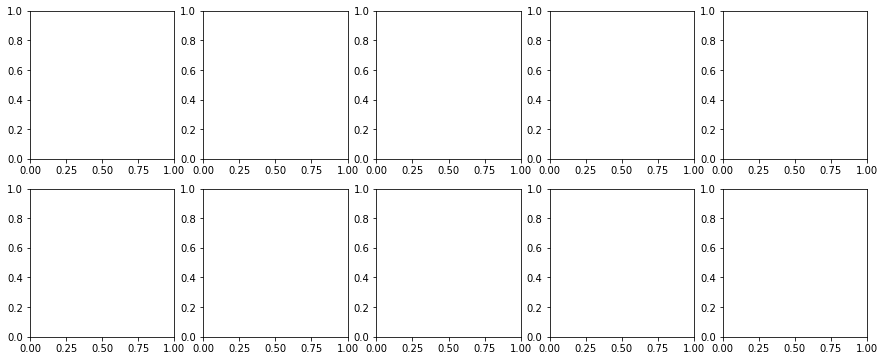

In [27]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)
y = tsne.fit_transform(X)

In [37]:
y

array([[  2.4306748 ,   6.0171847 ],
       [ 12.299997  ,   7.881828  ],
       [  6.368041  ,   0.75288165],
       [  2.7335289 ,  -2.100419  ],
       [ -5.21127   ,  -4.798759  ],
       [  9.183057  ,   0.49532744],
       [ -4.545549  ,  -2.353563  ],
       [ 24.272243  ,   6.07679   ],
       [ 23.344448  ,  12.480232  ],
       [ -6.9360704 ,  -2.013537  ],
       [ 16.226503  ,   9.718319  ],
       [  1.5899215 ,  -1.9489455 ],
       [  3.7535412 ,  -1.7648698 ],
       [ 25.290108  ,   6.464449  ],
       [-22.715963  , -14.048071  ],
       [-24.143486  ,  -9.97103   ],
       [-25.764465  , -12.482228  ],
       [ 19.105091  ,   8.843138  ],
       [ 15.116835  ,   9.922109  ],
       [ 19.82441   ,  10.7932825 ],
       [ 26.55005   ,   9.285544  ],
       [ 20.600681  ,   4.4736047 ],
       [ -3.5182848 ,  -1.1592305 ],
       [ 18.634365  ,   4.670954  ],
       [-22.99893   ,  -9.224396  ],
       [  8.5434475 ,   2.8711529 ],
       [-19.677979  , -12.884319  ],
 

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

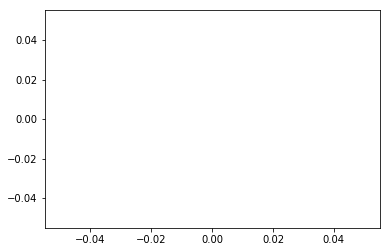

In [43]:
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(y[:, 0], y[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

In [44]:
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

In [45]:
# Scale and visualize the embedding vectors
# def plot_embedding(X, title=None):
#     x_min, x_max = np.min(X, 0), np.max(X, 0)
#     X = (X - x_min) / (x_max - x_min)

#     plt.figure()
#     ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(y[i]),
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(X.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
#     plt.xticks([]), plt.yticks([])
#     if title is not None:
#         plt.title(title)

# # t-SNE embedding of the digits dataset
# print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

# plot_embedding(X_tsne,
#                "t-SNE embedding of the digits")

# plt.show()

In [46]:
X_tsne

array([[  2.4306748 ,   6.0171847 ],
       [ 12.299997  ,   7.881828  ],
       [  6.368041  ,   0.75288165],
       [  2.7335289 ,  -2.100419  ],
       [ -5.21127   ,  -4.798759  ],
       [  9.183057  ,   0.49532744],
       [ -4.545549  ,  -2.353563  ],
       [ 24.272243  ,   6.07679   ],
       [ 23.344448  ,  12.480232  ],
       [ -6.9360704 ,  -2.013537  ],
       [ 16.226503  ,   9.718319  ],
       [  1.5899215 ,  -1.9489455 ],
       [  3.7535412 ,  -1.7648698 ],
       [ 25.290108  ,   6.464449  ],
       [-22.715963  , -14.048071  ],
       [-24.143486  ,  -9.97103   ],
       [-25.764465  , -12.482228  ],
       [ 19.105091  ,   8.843138  ],
       [ 15.116835  ,   9.922109  ],
       [ 19.82441   ,  10.7932825 ],
       [ 26.55005   ,   9.285544  ],
       [ 20.600681  ,   4.4736047 ],
       [ -3.5182848 ,  -1.1592305 ],
       [ 18.634365  ,   4.670954  ],
       [-22.99893   ,  -9.224396  ],
       [  8.5434475 ,   2.8711529 ],
       [-19.677979  , -12.884319  ],
 